In [1]:
# 🚀 Auto-setup: installs deps + configures CFBD access
import os
import sys
from pathlib import Path

# Find _auto_setup.py regardless of current working directory
_current = Path().resolve()
_auto_setup_path = None
for parent in [_current] + list(_current.parents):
    candidate = parent / "starter_pack" / "_auto_setup.py"
    if candidate.exists():
        _auto_setup_path = candidate
        # Add project root to sys.path (auto_setup.py will also do this)
        if str(parent) not in sys.path:
            sys.path.insert(0, str(parent))
        break

if _auto_setup_path and _auto_setup_path.exists():
    # Execute the file directly without changing directory
    with open(_auto_setup_path, 'r') as f:
        exec(f.read(), {'__file__': str(_auto_setup_path)})
else:
    # Fallback: try relative path
    try:
        with open("./_auto_setup.py", 'r') as f:
            exec(f.read(), {'__file__': './_auto_setup.py'})
    except FileNotFoundError:
        print("⚠️  Could not find _auto_setup.py. Please run from starter_pack directory.")


ModuleNotFoundError: No module named 'starter_pack'

In [2]:
# 12_efficiency_dashboards.ipynb
# 📊 One-Page Team Efficiency Dashboards

# 🛠 Requirements: pandas, matplotlib, seaborn, numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import sys
from pathlib import Path

# Import starter pack configuration system
_config_dir = Path().resolve() / "config"
if str(_config_dir.parent) not in sys.path:
    sys.path.insert(0, str(_config_dir.parent))
from config.data_config import get_starter_pack_config

# Get configuration
config = get_starter_pack_config()
current_year = config.current_year
DATA_DIR = str(config.data_dir)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 8)


In [3]:
# 📂 Load {current_year} advanced season stats

stats_path = str(config.get_advanced_stats_path(year=current_year))
stats = pd.read_csv(stats_path)
stats = stats[stats["conference"].notnull()].copy()


In [4]:
# 🎯 Pick a team to explore

team = "Michigan"  # Change this to any FBS team
row = stats[stats["team"] == team].squeeze()

if row.empty:
    raise ValueError(f"{team} not found in dataset.")

In [5]:
# 🎯 Select metrics and load team stats

offense_metrics = [
    "offense_ppa", "offense_successRate", "offense_explosiveness",
    "offense_standardDowns_ppa", "offense_passingDowns_ppa", 
    "offense_lineYards", "offense_stuffRate"
]

defense_metrics = [
    "defense_ppa", "defense_successRate", "defense_explosiveness",
    "defense_standardDowns_ppa", "defense_passingDowns_ppa", 
    "defense_lineYards", "defense_stuffRate"
]

summary = {
    "Team": team,
    **{k: row[k] for k in offense_metrics + defense_metrics}
}

pd.DataFrame(summary.items(), columns=["Metric", "Value"])

,Metric,Value
0,Team,Michigan
1,offense_ppa,0.22588
2,offense_successRate,0.467791
3,offense_explosiveness,1.148091
4,offense_standardDowns_ppa,0.186445
5,offense_passingDowns_ppa,0.327716
6,offense_lineYards,3.381333
7,offense_stuffRate,0.122667
8,defense_ppa,0.064781
9,defense_successRate,0.407351


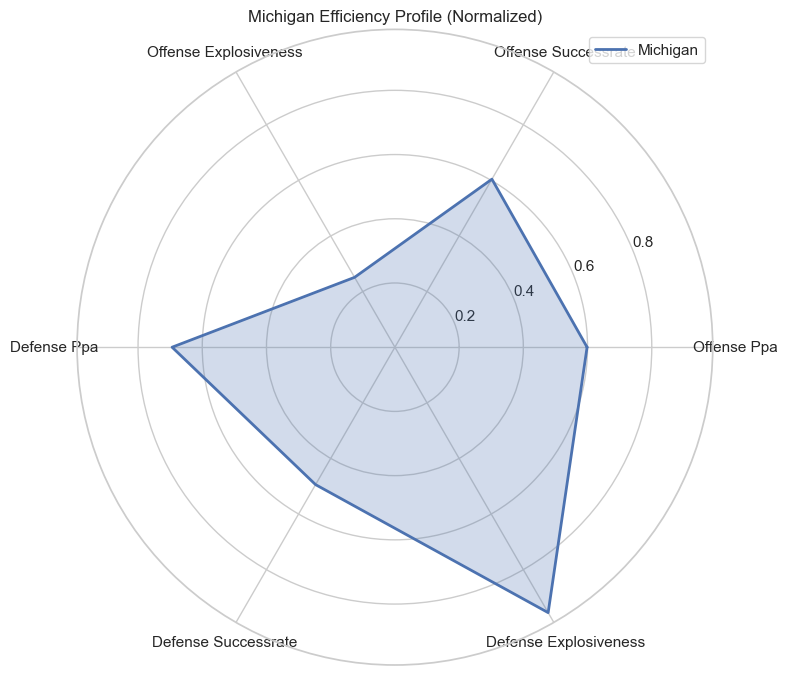

In [6]:
from math import pi
from sklearn.preprocessing import MinMaxScaler

# Combine selected metrics and normalize across all teams
metrics = offense_metrics[:3] + defense_metrics[:3]  # trim for readability

data = stats[["team"] + metrics].copy()
scaler = MinMaxScaler()

# Define which metrics should be inverted
invert_metrics = [m for m in metrics if m.startswith("defense_") or "stuffRate" in m or "havoc" in m]

# Invert these metrics (multiply by -1)
data_adj = data.copy()
data_adj[metrics] = data_adj[metrics].apply(lambda col: -col if col.name in invert_metrics else col)

# Normalize so that higher is always better
data_adj[metrics] = scaler.fit_transform(data_adj[metrics])

team_data = data_adj[data_adj["team"] == team].squeeze()

# Radar chart setup
categories = metrics
values = [team_data[m] for m in categories]
values += values[:1]  # close the circle

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label=team)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([m.replace("_", " ").title() for m in categories])
ax.set_title(f"{team} Efficiency Profile (Normalized)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# ✅ Summary

# In this notebook, you:
# - Selected a team and extracted its efficiency metrics
# - Built a one-page table of key stats
# - Visualized strengths and weaknesses on a radar chart
# - (Optionally) saved your dashboard to file

# 🧪 Try This:
# - Add percentile rank columns to the table
# - Build dashboards for all teams in a loop
# - Export a PDF or HTML report of all teams
